## General Comments

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

***Name:*** **Yashaswi Sharma**

***UID:*** 116245821

Each question is demarcated by section, and at the end of the section title is written which question it is by "(number)". For example, the section righ the below is the first question, and hence it has at the end of the section a "(1)" to signify this is the first question

# Give a reference for each image.  (where does it come from)  Label each image with your expectation (easy, medium, hard). (1)

**Image Easy =>** ***https://www.pinterest.com/pin/9218374221877338/***

**Image Medium =>** ***https://miswag.net/product/1611230657-orange-juice-%D8%B9%D8%B5%D9%8A%D8%B1-%D8%A7%D9%84%D8%A8%D8%B1%D8%AA%D9%82%D8%A7%D9%84***

**Image Difficult =>** ***https://www.goodfon.com/download/sobaki-banda-ochki/1024x1024/***

In [2]:
image_easy = Image.open('Bunny Image Easy.jpeg')
image_med = Image.open('Orange Juice Image.jpeg')
image_hard = Image.open('Dogs Image Hard.jpeg')

# What are the dimensions of the data in each image?  What is the shape of the tensor that is the data? (2) 

In [3]:
print('The dimensions of {} are {}'.format('Easy Image', image_easy.size))
print('The shape of tensor is {}'.format((image_easy.size[0],image_easy.size[1], 3)))
print('-------------------------------------')
print('The dimensions of {} are {}'.format('Medium Image', image_med.size))
print('The shape of tensor is {}'.format((image_med.size[0],image_med.size[1], 3)))
print('-------------------------------------')
print('The dimensions of {} are {}'.format('Hard Image', image_hard.size))
print('The shape of tensor is {}'.format((image_hard.size[0],image_hard.size[1], 3)))

The dimensions of Easy Image are (256, 256)
The shape of tensor is (256, 256, 3)
-------------------------------------
The dimensions of Medium Image are (512, 512)
The shape of tensor is (512, 512, 3)
-------------------------------------
The dimensions of Hard Image are (1024, 1024)
The shape of tensor is (1024, 1024, 3)


# Convert each image to grayscale. (3)

In [4]:
gray_easy = image_easy.convert('L')
gray_med = image_med.convert('L')
gray_hard = image_hard.convert('L')

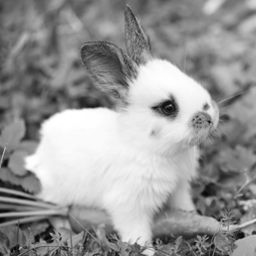

In [5]:
gray_easy

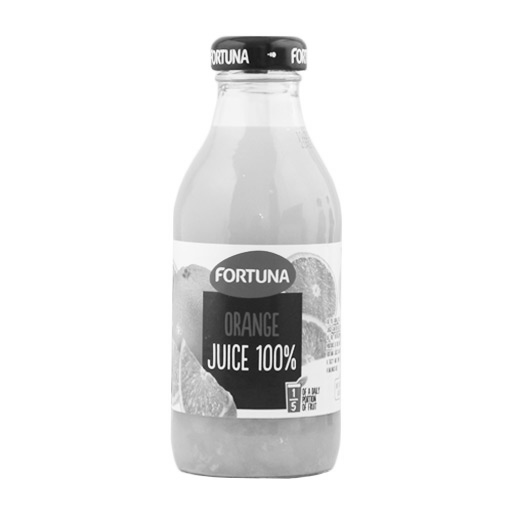

In [6]:
gray_med

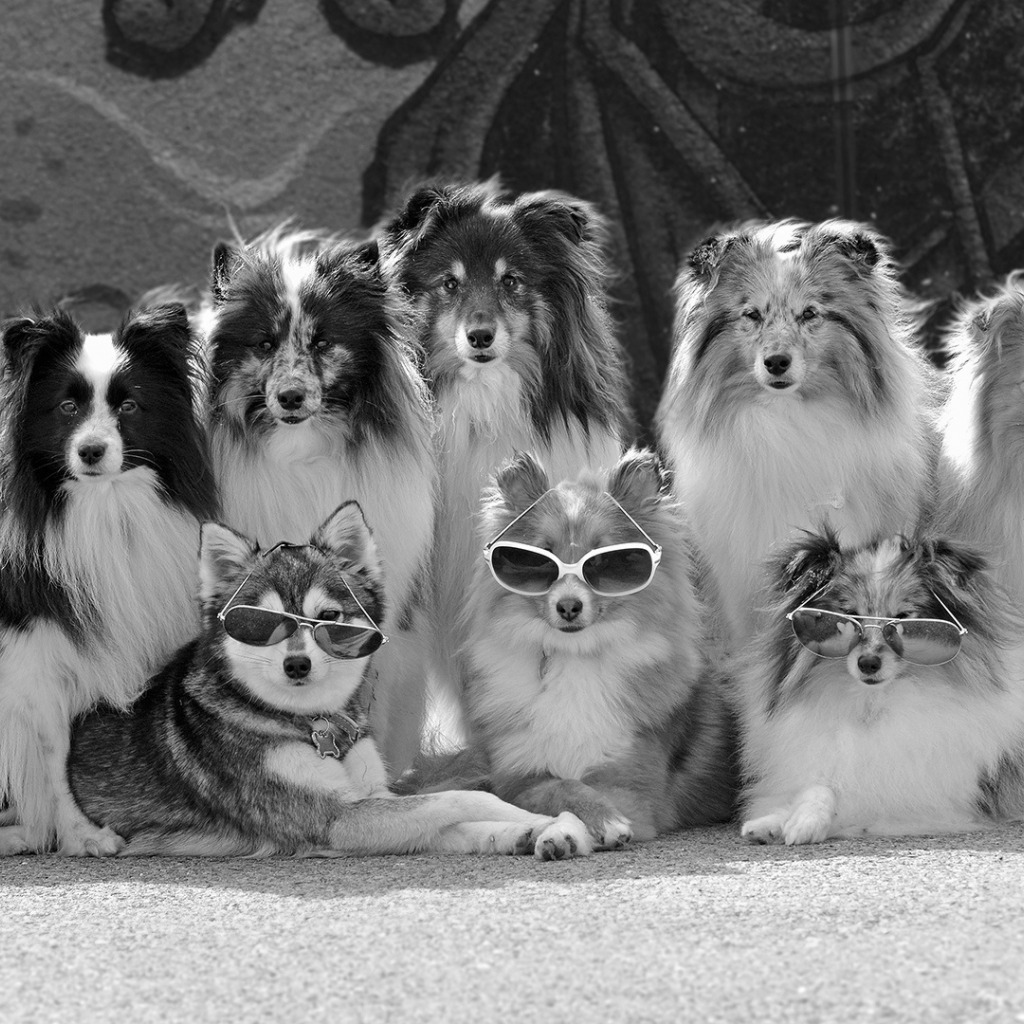

In [7]:
gray_hard

# Compute and show the compressions for various ranks, including rank = 5, rank = 25, rank = 50, rank =100, and if that image is not clear, then keep going until you get a decent image.  Also give the compression ratios. (4)

## Easy Image

Rank 5 Approx
Compression Ratio: 0.0391387939453125


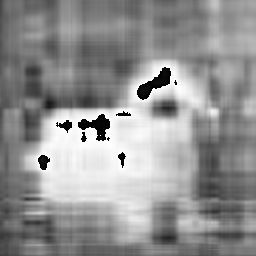

------------------------------
Rank 10 Approx
Compression Ratio: 0.078277587890625


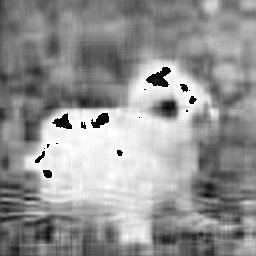

------------------------------
Rank 25 Approx
Compression Ratio: 0.1956939697265625


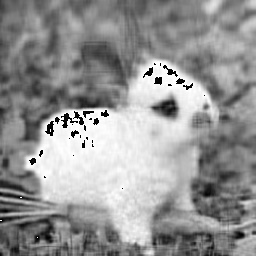

------------------------------
Rank 50 Approx
Compression Ratio: 0.391387939453125


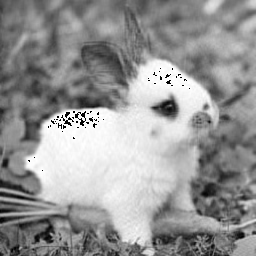

------------------------------
Rank 100 Approx
Compression Ratio: 0.78277587890625


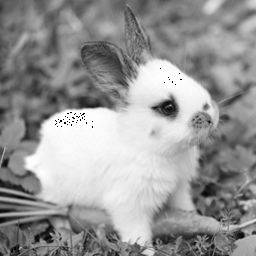

------------------------------
Rank 125 Approx
Compression Ratio: 0.9784698486328125


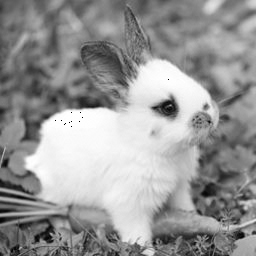

------------------------------
Rank 150 Approx
Compression Ratio: 1.174163818359375


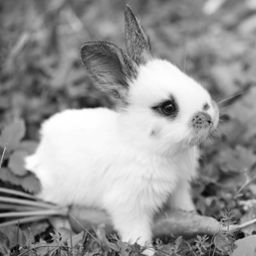

------------------------------


In [8]:
gme = np.array(gray_easy)
ranks = [5,10,25,50,100,125,150]
u,s,v = np.linalg.svd(gme, full_matrices=False)
si = np.identity(256) * s
for i in ranks:
    tmpu = u[:,:i]
    tmps = si[:i,:i]
    tmpv = v[:i,:] # becomes svd algo returns us v^T already
    img_approx = Image.fromarray(np.uint8(tmpu.dot(tmps).dot(tmpv)))
    print('Rank {} Approx'.format(i))
    print('Compression Ratio: {}'.format((256*i + i + 256*i)/(256*256)))
    display(img_approx)
    print('------------------------------')

## Medium Image

Rank 5 Approx
Compression Ratio: 0.019550323486328125


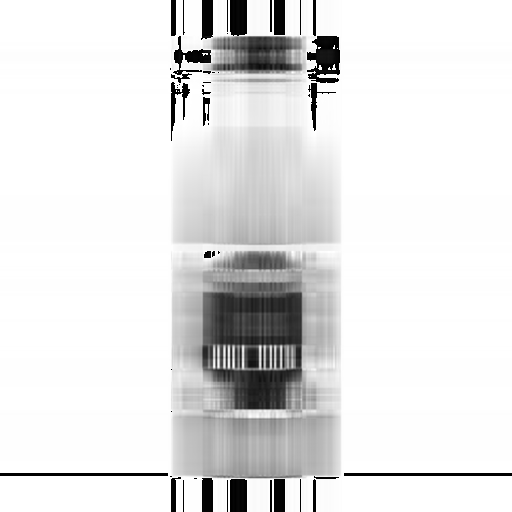

------------------------------
Rank 10 Approx
Compression Ratio: 0.03910064697265625


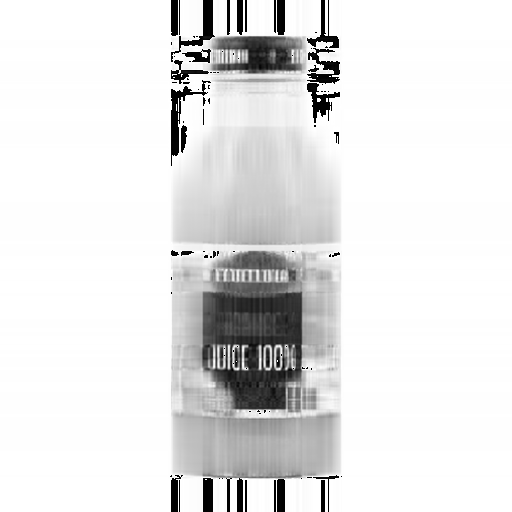

------------------------------
Rank 25 Approx
Compression Ratio: 0.09775161743164062


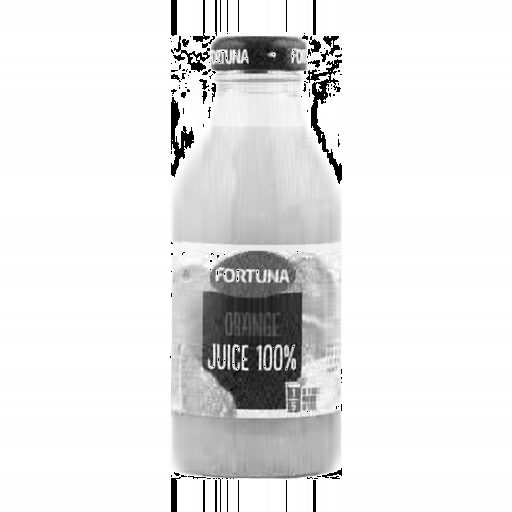

------------------------------
Rank 50 Approx
Compression Ratio: 0.19550323486328125


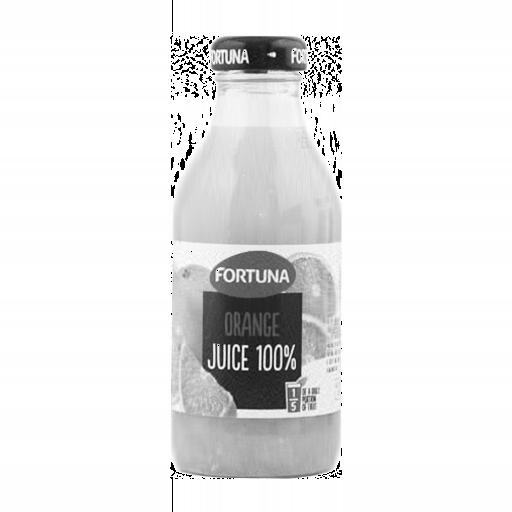

------------------------------
Rank 100 Approx
Compression Ratio: 0.3910064697265625


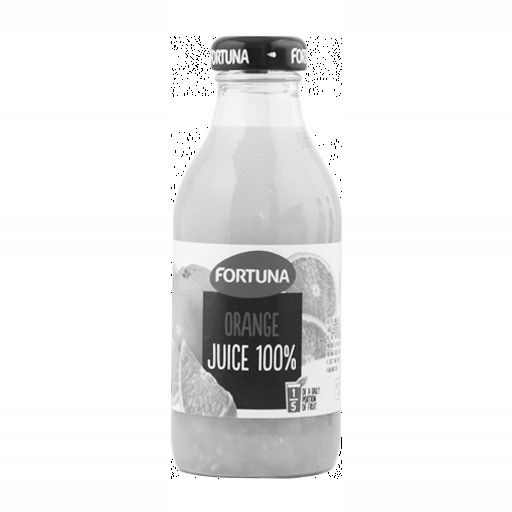

------------------------------
Rank 125 Approx
Compression Ratio: 0.4887580871582031


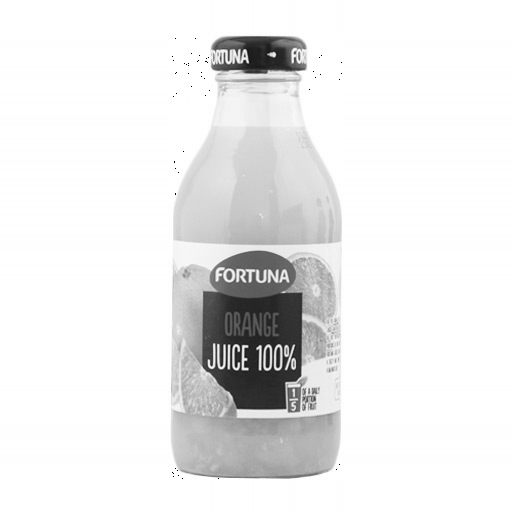

------------------------------
Rank 150 Approx
Compression Ratio: 0.5865097045898438


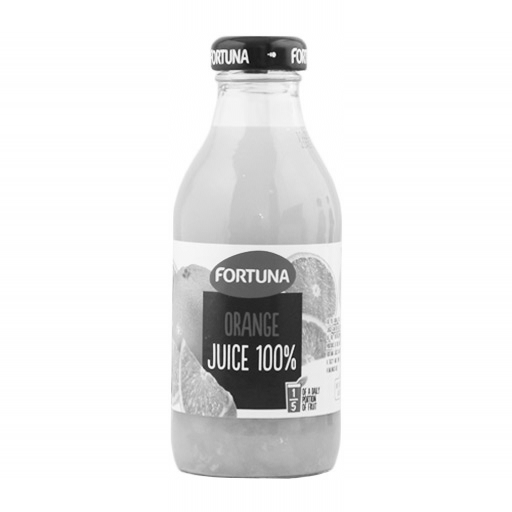

------------------------------


In [10]:
gmm = np.array(gray_med)
ranks = [5,10,25,50,100,125,150]
u,s,v = np.linalg.svd(gmm, full_matrices=False)
si = np.identity(512) * s
for i in ranks:
    tmpu = u[:,:i]
    tmps = si[:i,:i]
    tmpv = v[:i,:] # becomes svd algo returns us v^T already
    img_approx = Image.fromarray(np.uint8(tmpu.dot(tmps).dot(tmpv)))
    print('Rank {} Approx'.format(i))
    print('Compression Ratio: {}'.format((512*i + i + 512*i)/(512*512)))
    display(img_approx)
    print('------------------------------')

Turns out the **Medium** image was easier than the **Easy** image. Should have switched them around which makes sense since this image has a lot more whitespace in the background

## Hard Image

Rank 5 Approx
Compression Ratio: 0.009770393371582031


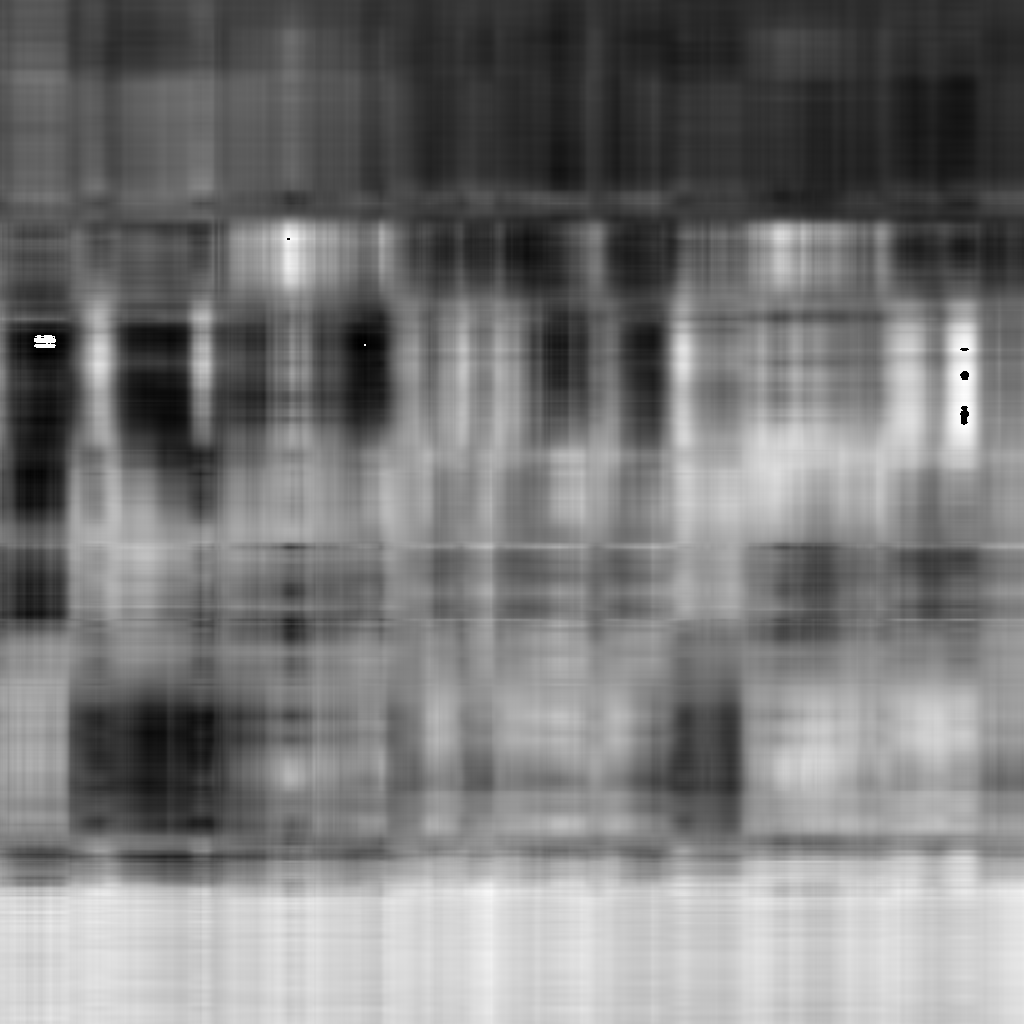

------------------------------
Rank 10 Approx
Compression Ratio: 0.019540786743164062


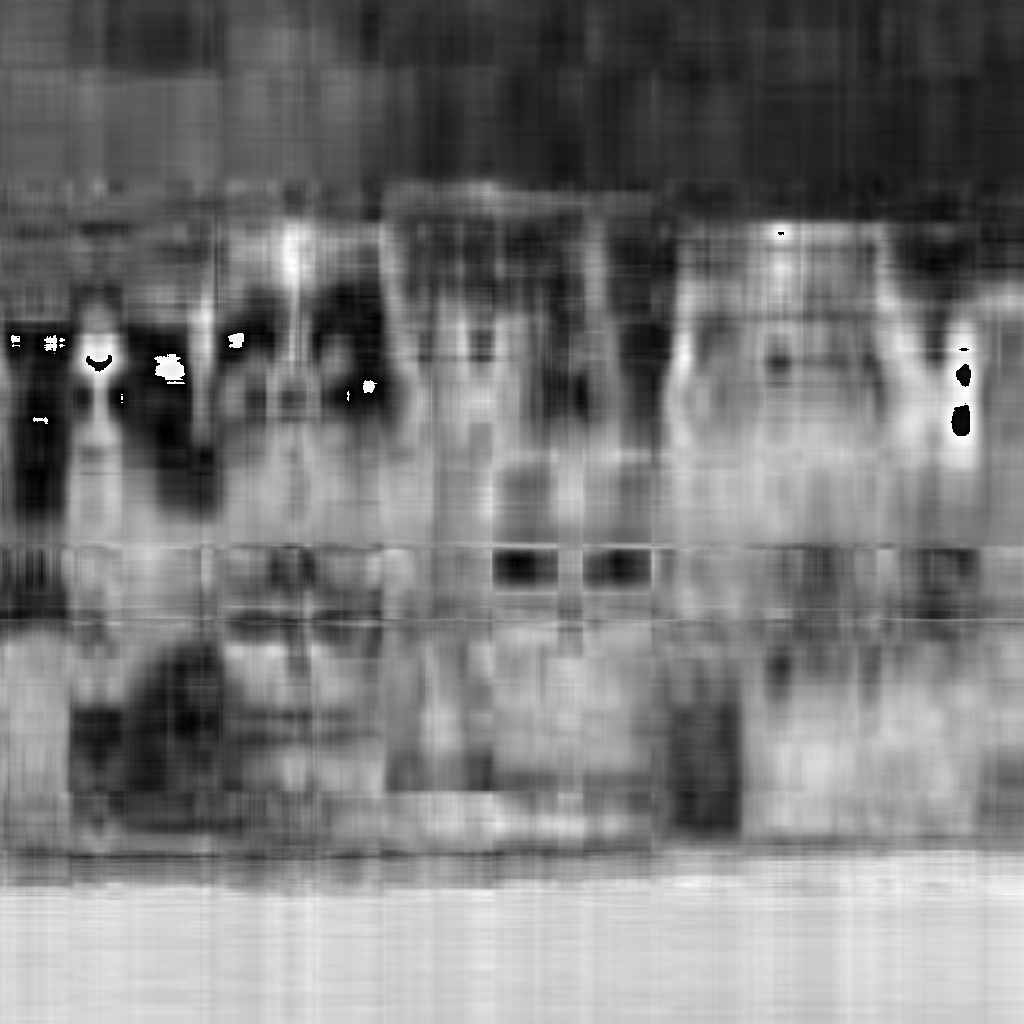

------------------------------
Rank 25 Approx
Compression Ratio: 0.048851966857910156


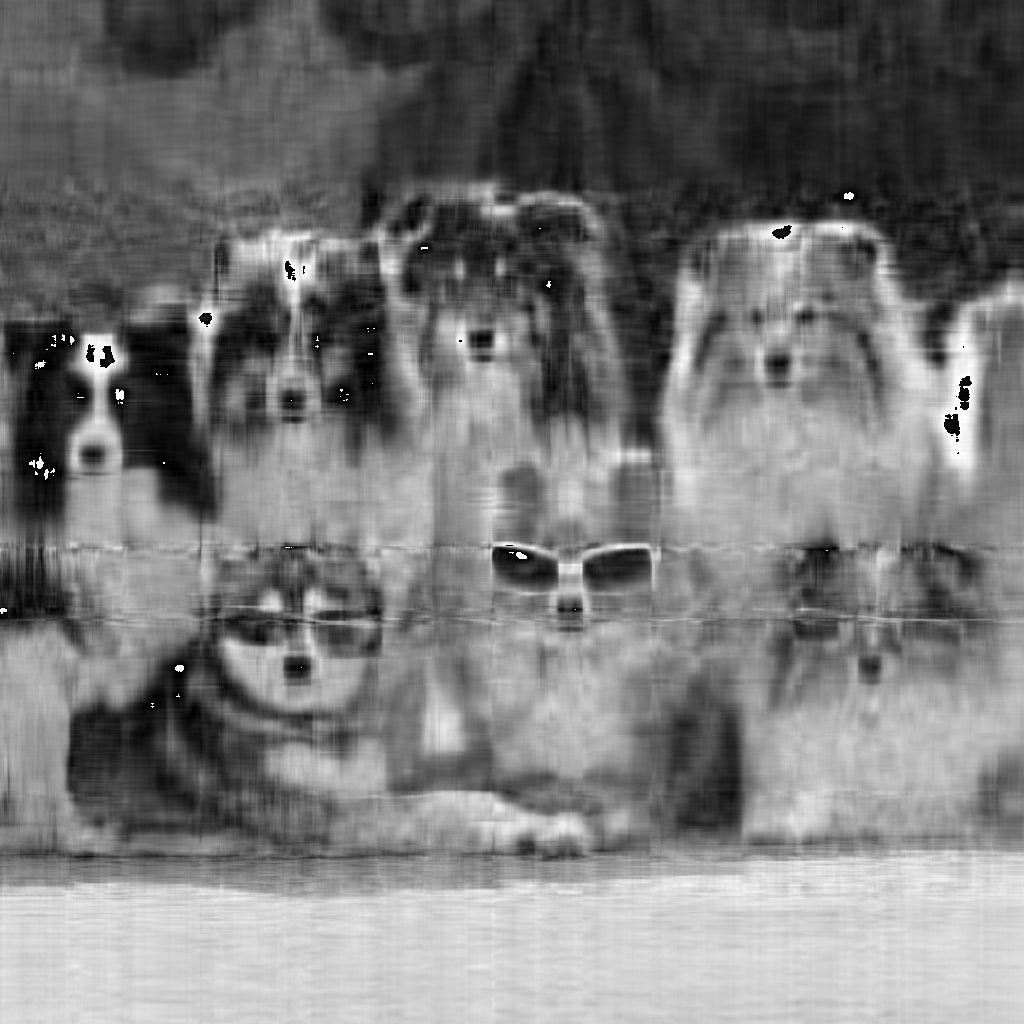

------------------------------
Rank 50 Approx
Compression Ratio: 0.09770393371582031


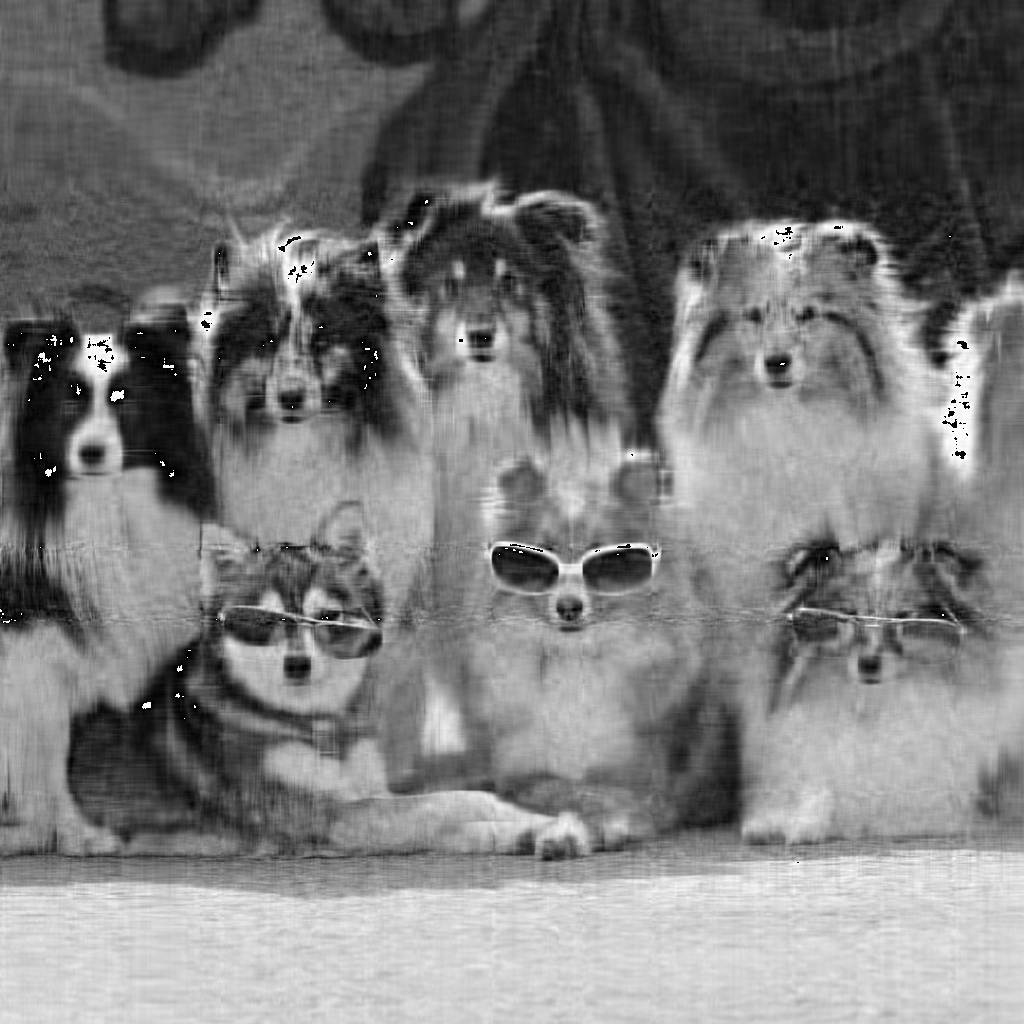

------------------------------
Rank 100 Approx
Compression Ratio: 0.19540786743164062


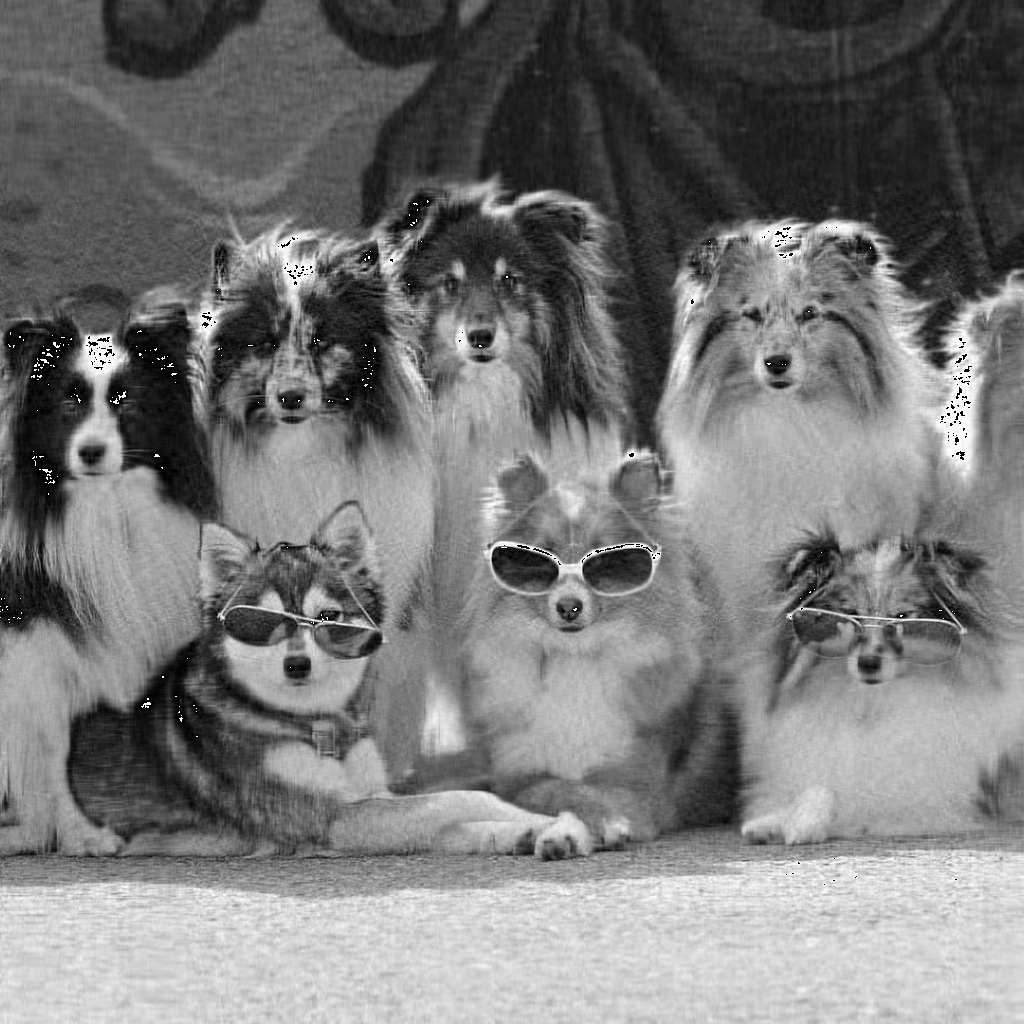

------------------------------
Rank 125 Approx
Compression Ratio: 0.24425983428955078


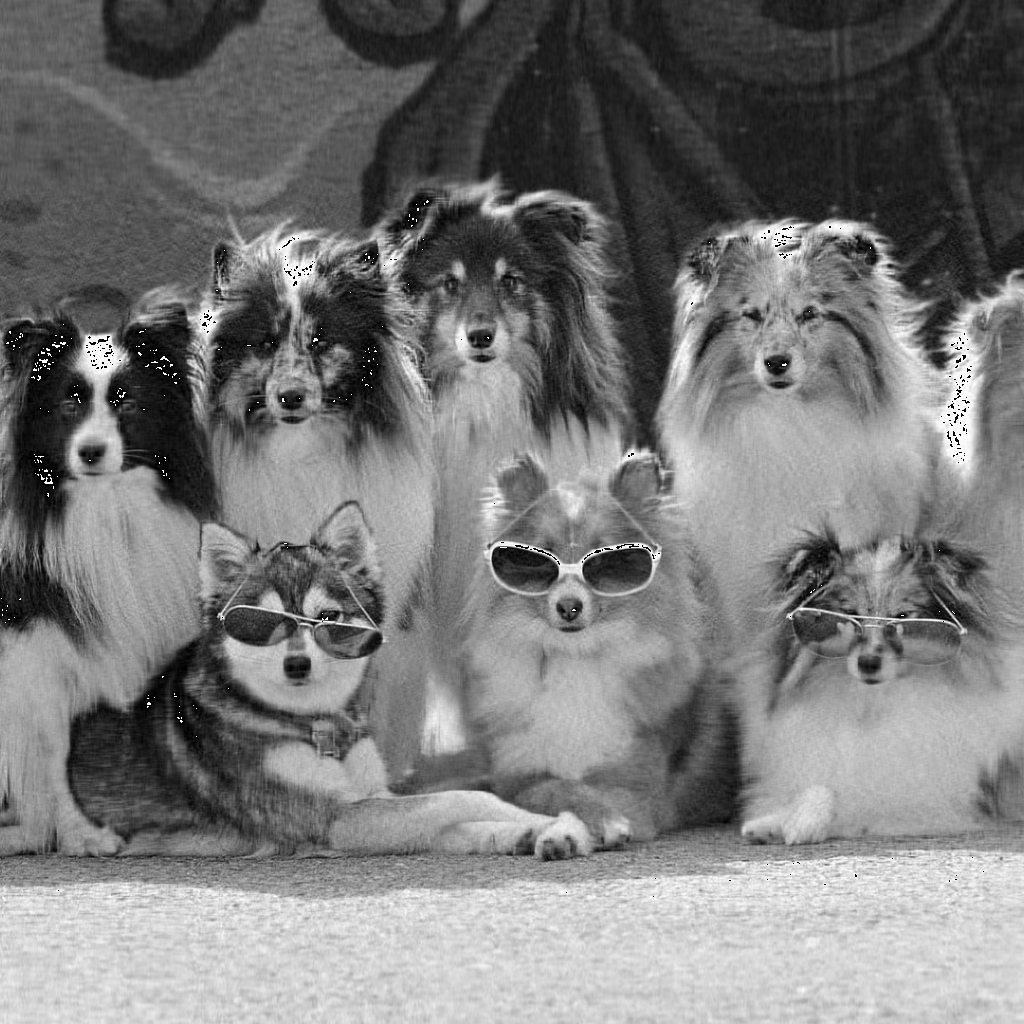

------------------------------
Rank 150 Approx
Compression Ratio: 0.29311180114746094


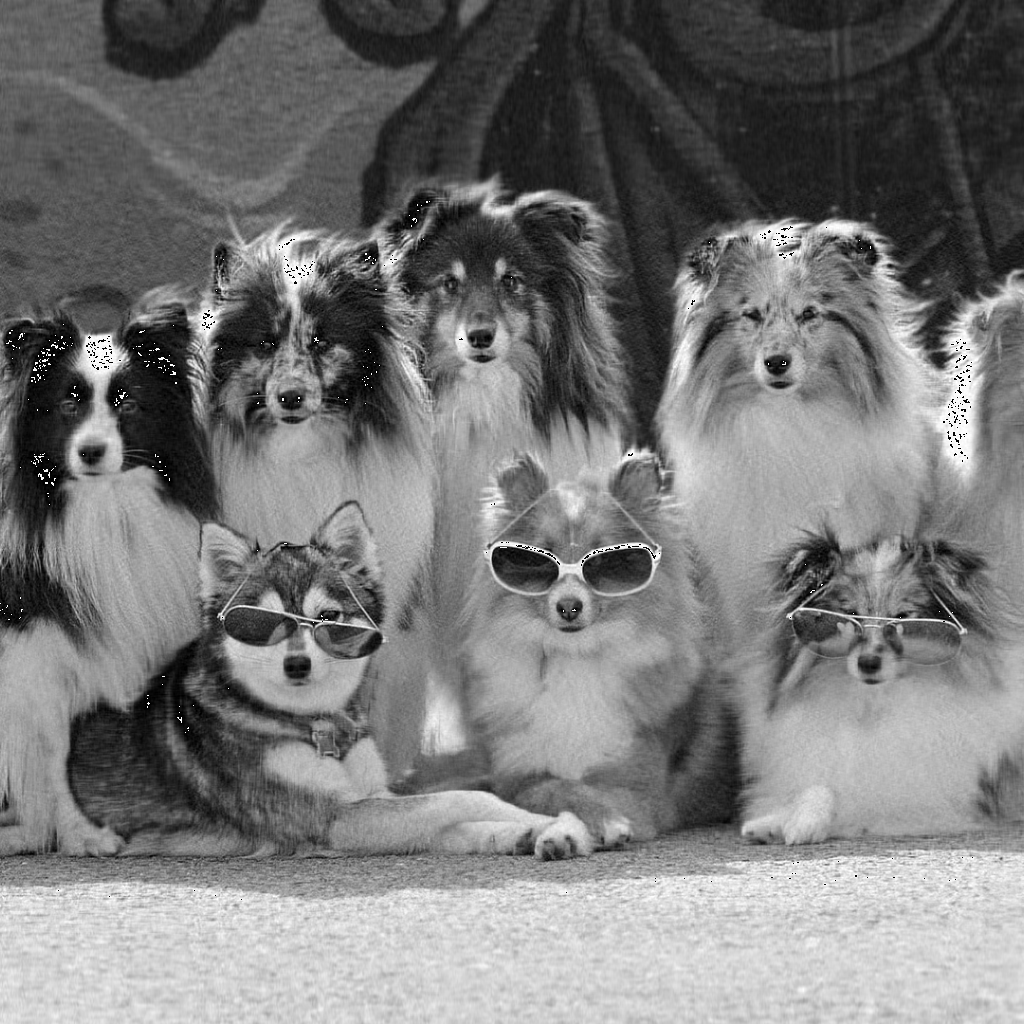

------------------------------
Rank 200 Approx
Compression Ratio: 0.39081573486328125


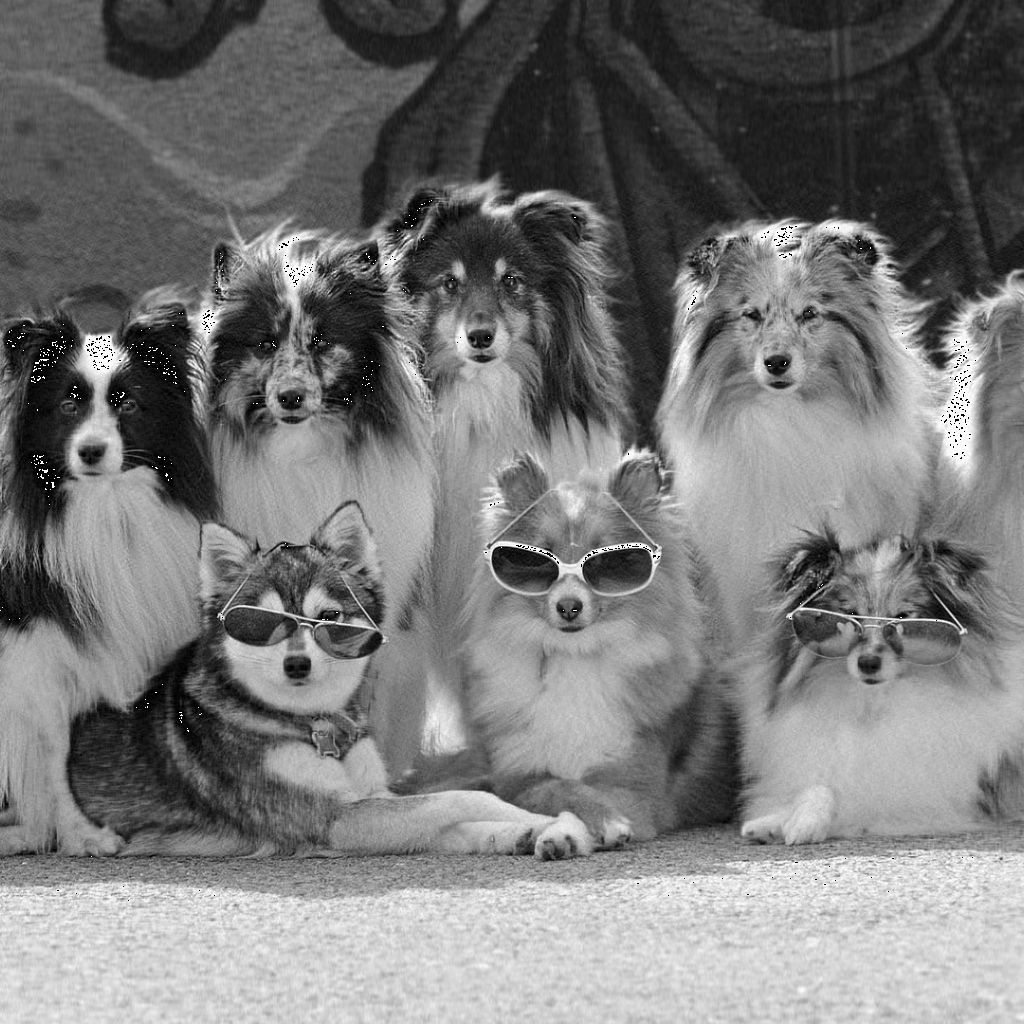

------------------------------
Rank 300 Approx
Compression Ratio: 0.5862236022949219


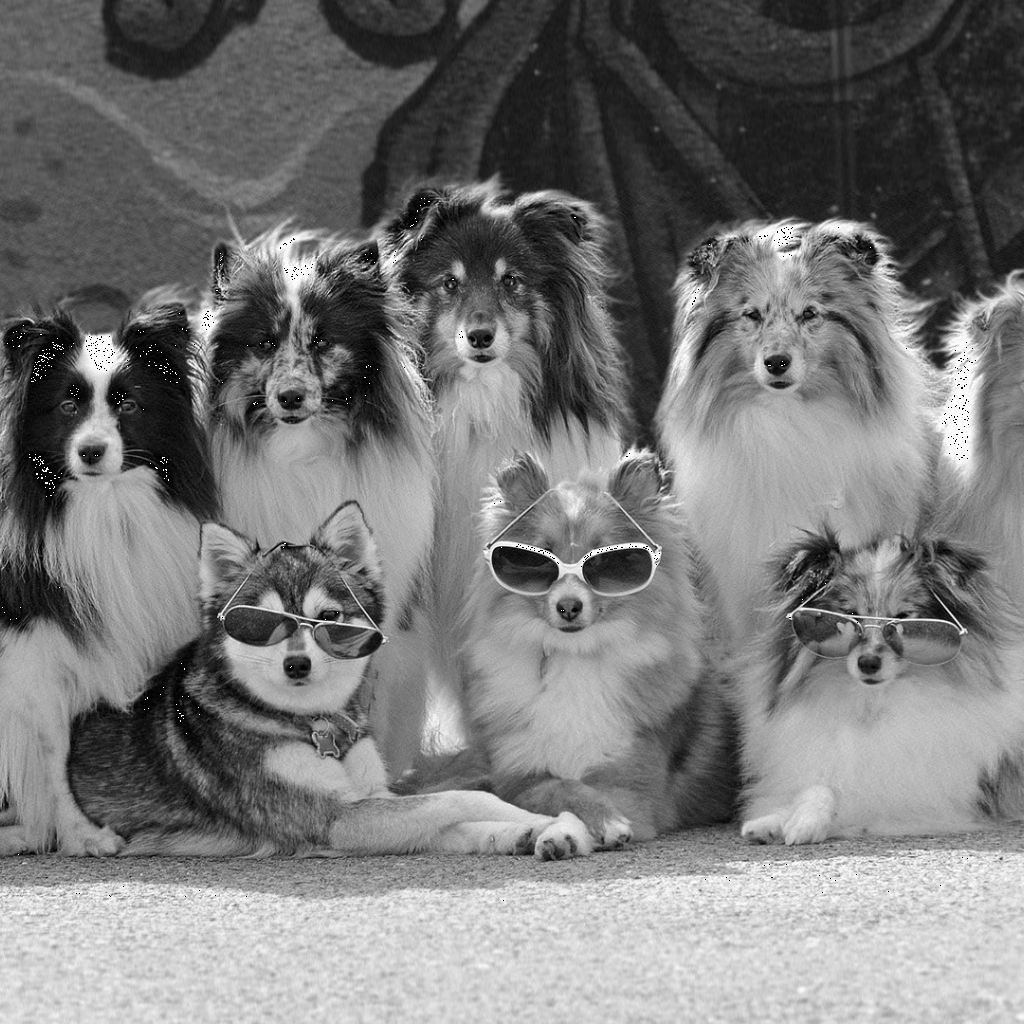

------------------------------
Rank 400 Approx
Compression Ratio: 0.7816314697265625


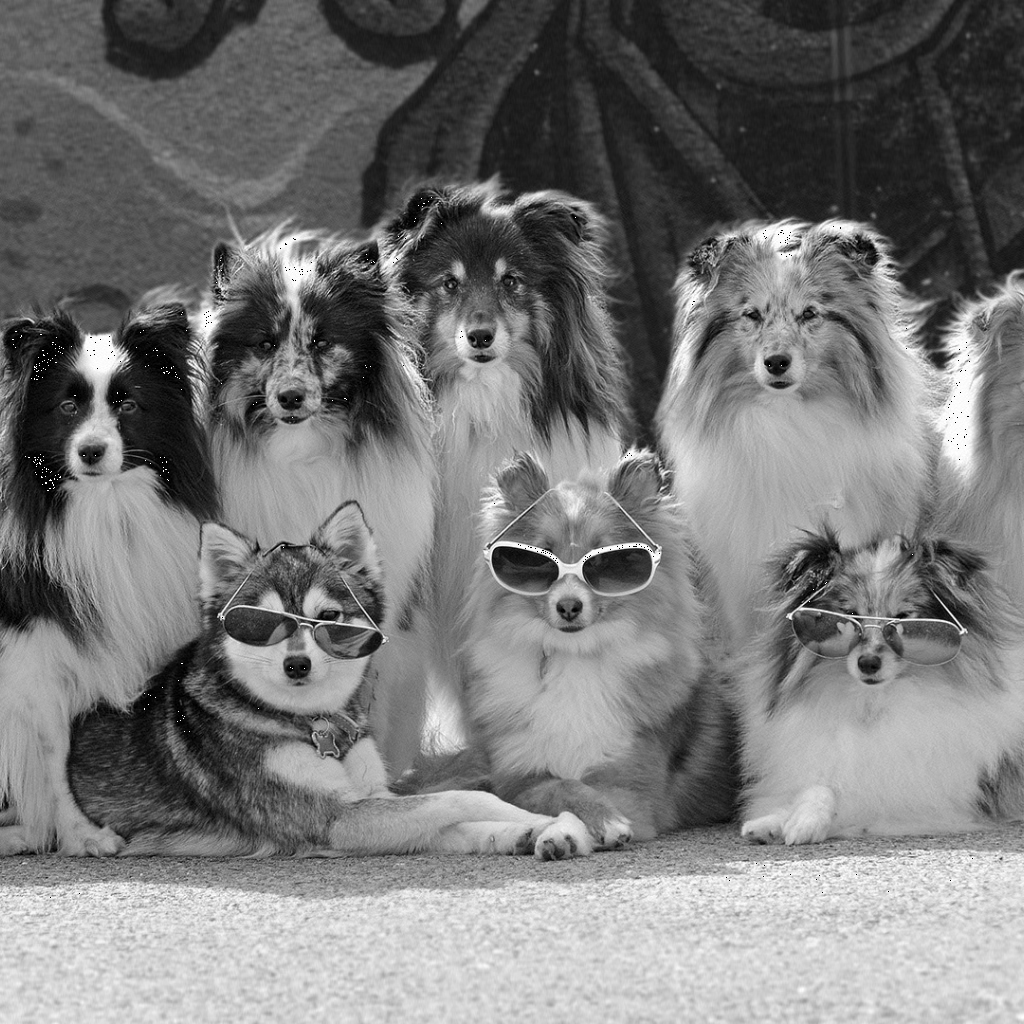

------------------------------
Rank 500 Approx
Compression Ratio: 0.9770393371582031


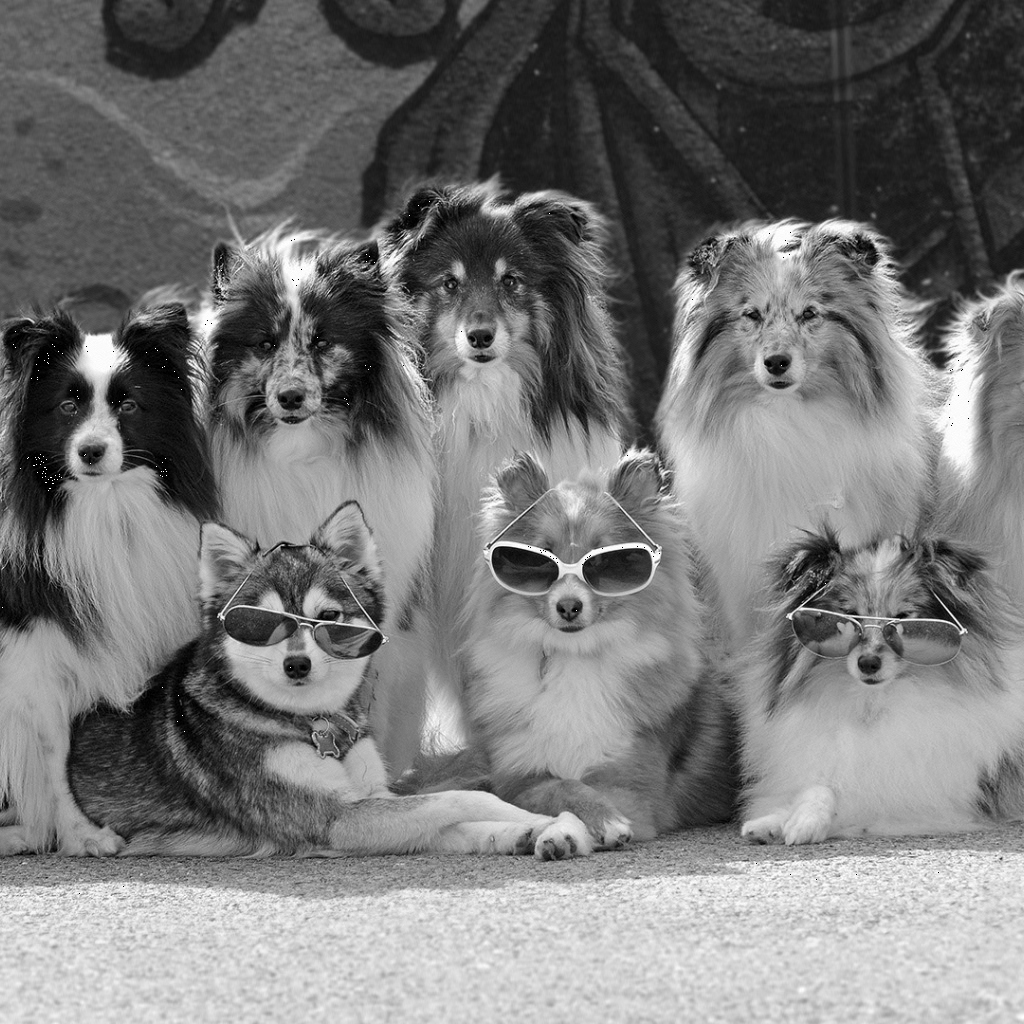

------------------------------
Rank 600 Approx
Compression Ratio: 1.1724472045898438


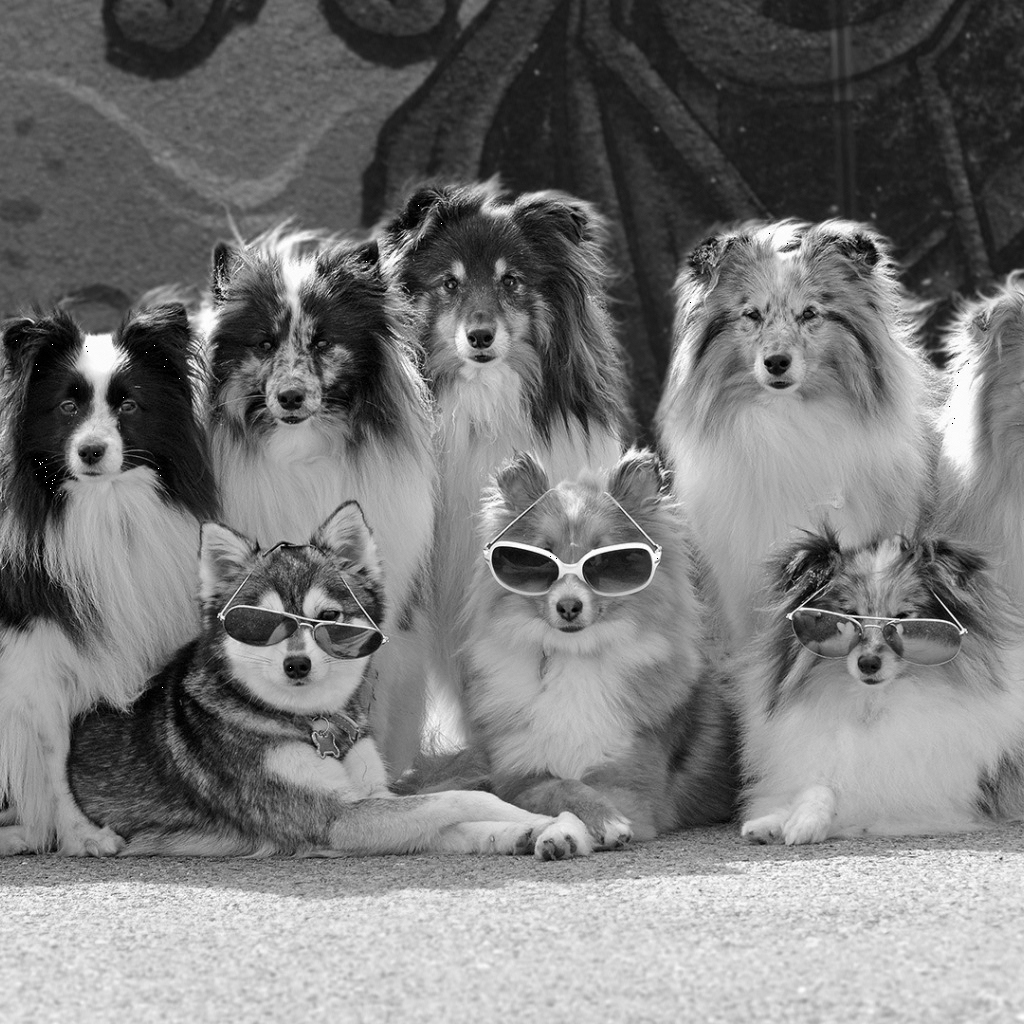

------------------------------


In [13]:
gmh = np.array(gray_hard)
ranks = [5,10,25,50,100,125,150,200,300,400,500,600]
u,s,v = np.linalg.svd(gmh, full_matrices=False)
si = np.identity(1024) * s
for i in ranks:
    tmpu = u[:,:i]
    tmps = si[:i,:i]
    tmpv = v[:i,:] # becomes svd algo returns us v^T already
    img_approx = Image.fromarray(np.uint8(tmpu.dot(tmps).dot(tmpv)))
    print('Rank {} Approx'.format(i))
    print('Compression Ratio: {}'.format((1024*i + i + 1024*i)/(1024*1024)))
    display(img_approx)
    print('------------------------------')

# What do you observe?  Was one of the images easier to compress than you thought?  Was one of them harder?  What sorts of features in the images compressed well and which not so well? (5)

Generally speaking, I chose the difficulty of my images by pixel density, which turned out to be somewhat irrelevant here. The **Medium** image turned out to be far easier than the **Easy** image primarily because there was a lot more whitespace present in the **Medium** image. The one thing I learned is that the difficulty in low-singular-value compression is derived from pixel variation (which makes sense by how SVD works). Because a lot of the **Medium** image was white space, there was only variation present around and in the bottle, hence it was easier to compress with a far fewer singular values. Similarly, because the **Hard** image had a lot of variation derived from the multiple dogs present in the image, it was far harder to compress hence it required far more singular values.

Large patches of unitary pixels compressed well, as demonstrated by the **Medium** image. Because the image was effectively binary (white space vs bottle), it was easier to compress it. That is opposed to the **Hard** image that required far more singular values since the fur coatings of the animals are minute patches of pixels, hence compressing it was harder as demonstrated by the weird white dots in the patches.